<h1 align="center">ECE 9022B: Advanced Image Processing and Analysis</h1>
<h3 align="center">Assignment #2</h3>
<h3 align="center">Junyi Zou, [jzou44@uwo.ca](mailto:jzou44@uwo.ca?subject=Assignment #2)</h3>
<h3 align="center">Department of Electronical and Computer Engineering</h3>
<h3 align="center">Western University</h3>
<h3 align="center">March 15, 2018</h3>
<h3 align="center">Submitted to: Elvis C.S. Chen</h3>

Task4:

Take any RGB picture and convert it to grayscale using the code you implemented in Task 1.

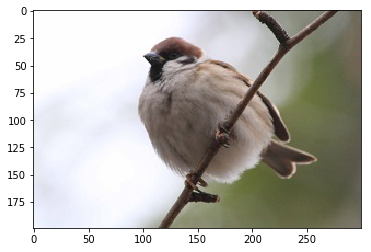

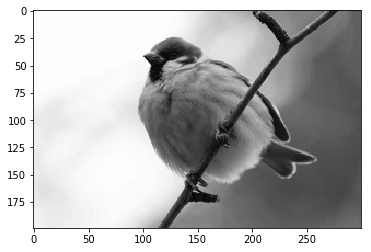

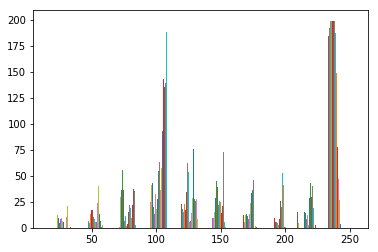

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import RGB2Gray
%matplotlib inline
RGB2Gray_converter = RGB2Gray.RGB2Gray()
outputImg_Gray = RGB2Gray_converter.convert_RBG_to_Gray("inputImg_RGB.jpg")
plt.imshow(sitk.GetArrayFromImage(sitk.ReadImage("inputImg_RGB.jpg")))
plt.figure()
plt.imshow(sitk.GetArrayFromImage(outputImg_Gray), cmap="gray")
plt.figure()
plt.hist(sitk.GetArrayFromImage(outputImg_Gray))
plt.show()

Validate myOtsuThresholding against SimpleITK::OtsuThresholdImageFilter

Computed Otsu's threshold value=168
SimpleITK otsu threshold=168.0


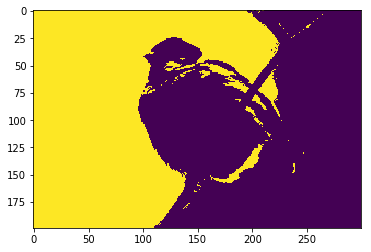

In [2]:
import myOtsuThresholding
#generated a binary thresholding image using the code from Task 2
myOtsu = myOtsuThresholding.myOtsuThresholding()
myOtsuImage = myOtsu.Otsu_threshold_from_Gray(outputImg_Gray)
#using SimpleITK's implementation of Otsu's method
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(1)
otsu_filter.SetOutsideValue(0)
sitk_otsu_seg = otsu_filter.Execute(outputImg_Gray)
print("SimpleITK otsu threshold={0}".format(otsu_filter.GetThreshold()))
#A plot of the thresholding binary image generated from myOtsuThresholding class
plt.imshow(sitk.GetArrayFromImage(myOtsuImage))

Validate myMaxEntropy against SimpleITK::MaximumEntropyThresholdImageFilter

Maximum entropy occurs at intensity:82
SimpleITK MaxEntropy threshold=81.0


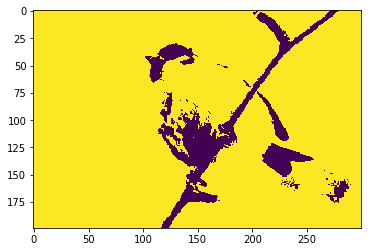

In [3]:
import myMaxEntropy
#generated a binary thresholding image using the code from Task 3,
my_max_Entropy = myMaxEntropy.myMaxEntropy()
my_max_Entropy_image = my_max_Entropy.max_entropy_threshold(outputImg_Gray)
#using SimpleITK::MaximumEntropyThresholdImageFilter, verify that the threshold value you computed from Task 3 is correct
MaxEntropy_Filter = sitk.MaximumEntropyThresholdImageFilter()
MaxEntropy_Filter.SetInsideValue(1)
MaxEntropy_Filter.SetOutsideValue(0)
sitk_MaxEntropy_seg = MaxEntropy_Filter.Execute(outputImg_Gray)
print("SimpleITK MaxEntropy threshold={0}".format(MaxEntropy_Filter.GetThreshold()))
#A plot of the thresholding binary image generated from myMaxEntropy class
plt.imshow(sitk.GetArrayFromImage(my_max_Entropy_image))

In [4]:
overlap_measures_filter = sitk.LabelOverlapMeasuresImageFilter()
overlap_measures_filter.Execute(sitk_otsu_seg, sitk_MaxEntropy_seg)
print("Jaccard Similarity Coefficient")
print(overlap_measures_filter.GetJaccardCoefficient())
print("Dice Similarity Coefficient")
print(overlap_measures_filter.GetDiceCoefficient())
print("False Positive Rate")
print(overlap_measures_filter.GetFalsePositiveError())
print("False Negative Rate")
print(overlap_measures_filter.GetFalseNegativeError())
#NOT necessary to use both Jaccard and Dice metrics together
#Since we can convert one to the other, it means that both of the metrics measure the same aspects and provide the same system ranking

Jaccard Similarity Coefficient
0.17859445519019987
Dice Similarity Coefficient
0.30306345733041573
False Positive Rate
0.8214055448098001
False Negative Rate
0.0
